In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)

In [2]:
data_df = pd.read_csv('Anime.csv')
data_df.head()

,ID,Title,Synonyms,Japanese,English,Synopsis,Type,Episodes,Status,Start_Aired,End_Aired,Premiered,Broadcast,Producers,Licensors,Studios,Source,Genres,Themes,Demographics,Duration_Minutes,Rating,Score,Scored_Users,Ranked,Popularity,Members,Favorites
0,16498,Shingeki no Kyojin,"AoT, SnK",進撃の巨人,Attack on Titan,"Centuries ago, mankind was slaughtered to near...",TV,25.0,Finished Airing,"Apr 7, 2013","Sep 29, 2013",Spring 2013,Sundays at 0158 (JST),"Production I.G, Dentsu, Mainichi Broadcasting ...",Funimation,Wit Studio,Manga,"Action, Drama","Gore, Military, Survival",Shounen,24.0,R - 17+ (violence & profanity),8.531,519803.0,1002.0,1,3524109,155695
1,1535,Death Note,DN,デスノート,Death Note,"Brutal murders, petty thefts, and senseless vi...",TV,37.0,Finished Airing,"Oct 4, 2006","Jun 27, 2007",Fall 2006,Wednesdays at 0056 (JST),"VAP, Konami, Ashi Productions, Nippon Televisi...",VIZ Media,Madhouse,Manga,"Supernatural, Suspense",Psychological,Shounen,23.0,R - 17+ (violence & profanity),8.621,485487.0,732.0,2,3504535,159701
2,5114,Fullmetal Alchemist: Brotherhood,"Hagane no Renkinjutsushi Fullmetal Alchemist, ...",鋼の錬金術師 FULLMETAL ALCHEMIST,Fullmetal Alchemist Brotherhood,After a horrific alchemy experiment goes wrong...,TV,64.0,Finished Airing,"Apr 5, 2009","Jul 4, 2010",Spring 2009,Sundays at 1700 (JST),"Aniplex, Square Enix, Mainichi Broadcasting Sy...","Funimation, Aniplex of America",Bones,Manga,"Action, Adventure, Drama, Fantasy",Military,Shounen,24.0,R - 17+ (violence & profanity),9.131,900398.0,12.0,3,2978455,207772
3,30276,One Punch Man,"One Punch-Man, One-Punch Man, OPM",ワンパンマン,One Punch Man,The seemingly unimpressive Saitama has a rathe...,TV,12.0,Finished Airing,"Oct 5, 2015","Dec 21, 2015",Fall 2015,Mondays at 0105 (JST),"TV Tokyo, Bandai Visual, Lantis, Asatsu DK, Ba...",VIZ Media,Madhouse,Web manga,"Action, Comedy","Parody, Super Power",Seinen,24.0,R - 17+ (violence & profanity),8.511,19066.0,1112.0,4,2879907,59651
4,11757,Sword Art Online,"S.A.O, SAO",ソードアート・オンライン,Sword Art Online,Ever since the release of the innovative Nerve...,TV,25.0,Finished Airing,"Jul 8, 2012","Dec 23, 2012",Summer 2012,Sundays at 0000 (JST),"Aniplex, Genco, DAX Production, ASCII Media Wo...",Aniplex of America,A-1 Pictures,Light novel,"Action, Adventure, Fantasy, Romance","Love Polygon, Video Game",Unknown,23.0,PG-13 - Teens 13 or older,7.201,990254.0,29562.0,5,2813565,64997


## Mùa nào xuất bản nhiều phim nhất? Phim xuất bản trong mùa nào có nhiều người xem nhất?

Đầu tiên ta cần thêm 1 cột "Season" để chứa thông tin về mùa, dữ liệu từ cột này là phần tử trước khoảng trắng trong cột "Premiered".

In [3]:
data_df['Season'] = data_df['Premiered'].str.split(' ').str[0]
# data_df['Season']

Thực hiện thống kê với "sum" là tổng số lượt xem, "count" là số lượng phim, "mean" là lượng xem trung bình của phim.

In [4]:
season_stat = data_df.groupby(['Season'])['Members'].agg(['sum', 'count', 'mean']).reset_index()
season_stat

,Season,sum,count,mean
0,Fall,186151498,1531,121588.176355
1,Spring,191628669,1715,111736.833236
2,Summer,130611864,922,141661.457701
3,Unknown,205997984,16236,12687.729983
4,Winter,128257473,1056,121455.940341


Sau đó ta gán nhãn cho 4 mùa theo thứ tự tăng dần từ 0: "Spring" đến 4: "Unknown" và sắp xếp thứ tự cho dữ liệu dựa trên cột này.

In [5]:
season_stat['rank'] = [2, 0, 1, 4, 3]
season_stat = season_stat.sort_values(by = 'rank')
season_stat

,Season,sum,count,mean,rank
1,Spring,191628669,1715,111736.833236,0
2,Summer,130611864,922,141661.457701,1
0,Fall,186151498,1531,121588.176355,2
4,Winter,128257473,1056,121455.940341,3
3,Unknown,205997984,16236,12687.729983,4


### Thực hiện thống kê về số lượng phim được sản xuất trong từng mùa

Text(0.5, 1.0, 'Tỉ lệ số lượng phim xuất bản theo mùa')

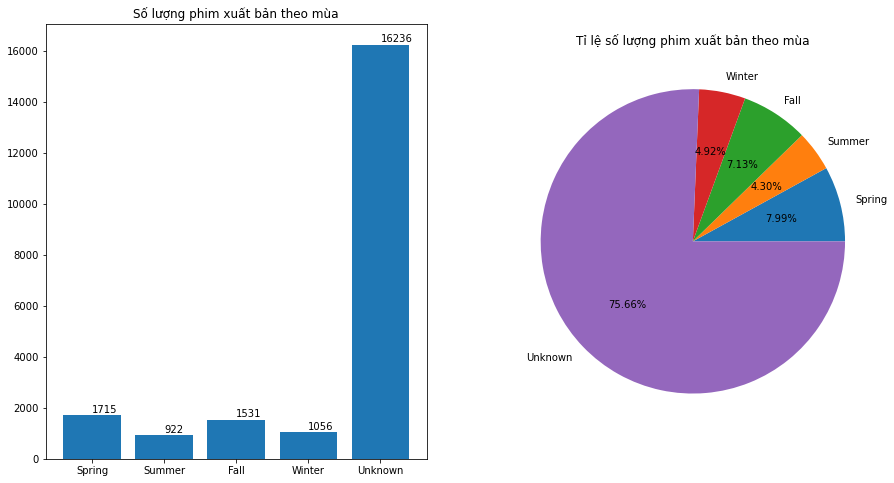

In [6]:
fig, axes = plt.subplots(1, 2, figsize=(15, 8))
axes[0].bar(data = season_stat, x = 'Season', height = 'count')
axes[0].set_title('Số lượng phim xuất bản theo mùa')
for x in range(len(season_stat['Season'])):
    axes[0].annotate(str(season_stat['count'][x]), xy = (season_stat['Season'][x], season_stat['count'][x] + 100))
    
axes[1].pie(season_stat['count'], labels = season_stat['Season'], autopct='%.2f%%')
axes[1].set_title('Tỉ lệ số lượng phim xuất bản theo mùa')

Nhận xét:
- Các mùa có số lượng phim xuất bản cao và thấp xen kẽ nhau, tập trung chủ yếu vào mùa xuân và thu.
- Các truyện không xác định được mùa xuất bản chiếm số lượng lớn, hơn 3/4 tổng số lượng phim.

### Thống kê về lượt xem của phim theo từng mùa

Text(0.5, 1.0, 'Tỉ lệ tổng số lượt xem của phim chia theo mùa xuất bản')

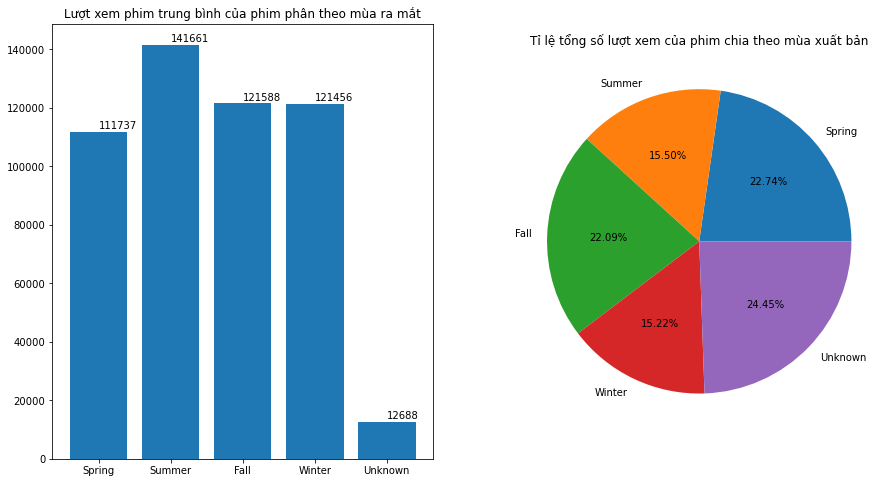

In [7]:
fig, axes = plt.subplots(1, 2, figsize=(15, 8))

axes[0].bar(data = season_stat, x = 'Season', height = 'mean')
axes[0].set_title('Lượt xem phim trung bình của phim phân theo mùa ra mắt')
for x in range(len(season_stat['Season'])):
    axes[0].annotate(str(round(season_stat['mean'][x])), xy = (season_stat['Season'][x], season_stat['mean'][x] + 1000))

axes[1].pie(season_stat['sum'], labels = season_stat['Season'], autopct='%.2f%%')
axes[1].set_title('Tỉ lệ tổng số lượt xem của phim chia theo mùa xuất bản')

Nhận xét:
- Ở đây ta nhìn thấy được số lượng phim và lượt xem trung bình tỉ lệ nghịch với nhau, ở trên số lượng phim cao nhất là "Unknown" chiếm hơn 3/4 tổng số thì ở đây lượt xem trung bình chỉ đạt 1/11 so với lượt xem của các phim sản xuất vào mùa hè. Mùa xuân có lượng phim xuất bản cao nhất trong 4 mùa nhưng lượt xem trung bình thì thấp nhấp.
- Nhờ vào sự chênh lệch lớn về lượt xem trung bình nên nhìn chung, tổng số lượt xem của phim theo từng mùa không bị chênh nhau quá nhiều.

## Chia theo Demographics thì phim nào được sản xuất nhiều nhất? Phim loại nào có nhiều người xem nhất?

Đầu tiên ta hãy xem dữ liệu của cột "Demographics"

In [8]:
demo = data_df['Demographics'].unique()
demo

array(['Shounen', 'Seinen', 'Unknown', 'Shoujo', 'Kids', 'Josei',
       'Kids, Shounen', 'Josei, Shoujo', 'Kids, Seinen', 'Kids, Shoujo'],
      dtype=object)

Hmmm, nhiều dòng có chứa nhiều giá trị như 'Kids, Shounen', 'Josei, Shoujo', 'Kids, Seinen', 'Kids, Shoujo'. Vậy thì ta sẽ thực hiện tách nó ra, nhưng có vẻ sẽ tốn công tách lại 1 lần nữa cho câu hỏi sau nên ta sẽ chuẩn bị dữ liệu cho cả 2 câu hỏi luôn nhé

Ta tạo 1 dataframe gồm các cột cần sử dụng và sử lý qua chúng. Các cột cần sử dụng là 'Demographics', 'Members', 'Season' trong đó cột 'Demographics' cần phải tách các dữ liệu ra. Ta sẽ thực hiện việc trên bằng phép split

In [9]:
ser = pd.DataFrame({'Demographics': data_df['Demographics'].str.split(', '), 'view': data_df['Members'], 'Season': data_df['Season']})
# ser

Tạo dataframe với dữ liệu là cột 'Demographics', index là 2 cột còn lại. Việc này sẽ tách list trong cột 'Demographics' thành nhiều cột khác nhau với số lượng cột là kích thước của list có nhiều phần tử nhất (ở dây là 2), những list có ít phần tử hơn thì các cột còn lại sẽ có giá trị là None. Cột dữ liệu sẽ được đánh số từ 0.

In [10]:
data = pd.DataFrame(data = ser['Demographics'].values.tolist(), index = [ser['view'].values, ser['Season'].values])
# data

0     1
3524109 Spring   Shounen  None
3504535 Fall     Shounen  None
2978455 Spring   Shounen  None
2879907 Fall      Seinen  None
2813565 Summer   Unknown  None
...                  ...   ...
7       Unknown     Kids  None
6       Unknown     Kids  None
        Unknown  Unknown  None
        Unknown  Unknown  None
        Unknown     Kids  None

[21460 rows x 2 columns]

Tiến hành stack dataframe trên, tạo thành 1 dataframe mới thêm 1 cột vào index với giá trị là tên cột của data trên (0, 1), 1 cột data duy nhất với giá trị đơn của các 'Demographics', không có dòng giá trị None.

In [11]:
data = data.stack()
# data

3524109  Spring   0    Shounen
3504535  Fall     0    Shounen
2978455  Spring   0    Shounen
2879907  Fall     0     Seinen
2813565  Summer   0    Unknown
                        ...   
7        Unknown  0       Kids
6        Unknown  0       Kids
                  0    Unknown
                  0    Unknown
                  0       Kids
Length: 21560, dtype: object

Ta sẽ reset_index để chuyển các cột index ban đầu thành cột data và đặt tên cho chúng. (View là cột Members lúc đầu)

In [12]:
data = data.reset_index()
data.columns = ['View', 'Season', '', 'Demographics']
# data
# data = data.groupby([''])

Thống kê về số lượng phim, tổng lượt xem và lượt xem trung bình cho từng loại trong Demographics theo từng mùa.

In [13]:
data = data.groupby(['Demographics', 'Season'])['View'].agg(['sum', 'count', 'mean']).reset_index()
# data

Như vậy ta đã chuẩn bị xong dữ liệu.

Nhưng dữ liệu cho câu hỏi này không cần chia theo mùa nên ta sẽ thống kê lại từ bộ dữ liệu đã chuẩn bị.

In [14]:
demo_stat = data.groupby(['Demographics'])[['sum', 'count']].sum().reset_index()
demo_stat['mean'] = demo_stat['sum'] / demo_stat['count']
demo_stat

,Demographics,sum,count,mean
0,Josei,6559003,101,64940.623762
1,Kids,8498026,4324,1965.315911
2,Seinen,86828974,909,95521.423542
3,Shoujo,36873230,706,52228.371105
4,Shounen,249696886,2094,119243.976122
5,Unknown,454769163,13426,33872.274914


### Thống kê về lượng phim theo từng thể loại

Text(0.5, 1.0, 'Tỉ lệ số lượng phim theo đối tượng xem')

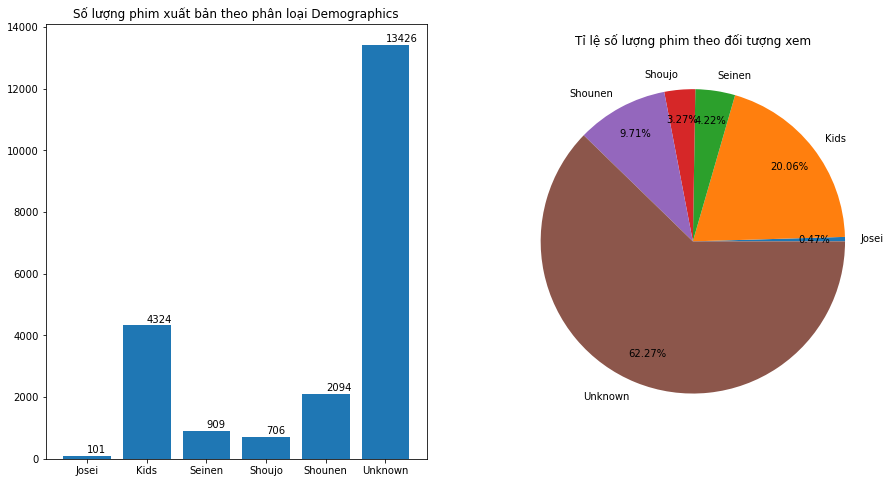

In [24]:
fig, axes = plt.subplots(1, 2, figsize=(15, 8))
axes[0].bar(data = demo_stat, x = 'Demographics', height = 'count')
axes[0].set_title('Số lượng phim xuất bản theo phân loại Demographics')
for x in range(len(demo_stat['Demographics'])):
    axes[0].annotate(str(round(demo_stat['count'][x])), xy = (demo_stat['Demographics'][x], demo_stat['count'][x] + 100))
    
axes[1].pie(demo_stat['count'], labels = demo_stat['Demographics'], autopct='%.2f%%', pctdistance=0.8)
axes[1].set_title('Tỉ lệ số lượng phim theo đối tượng xem')

Nhận xét:
-  Josei (manga dành cho phụ nữ): có số lượng rất ít 0.47% trong khi đó thể loại tương đương dành cho nam là Seinen có số lượng gấp 9 lần.
- Shoujo (dành cho thiếu nữ) gấp 7 lần Josei nhưng chỉ bằng 1/3 so với thể loại tương đương dành cho nam là Shounen.
- Phim dành cho trẻ em (Kids) có số lượng hơn cả tổng của 4 thể loại trên và bằng 1/3 so với "Unknown".

Như vậy ta có thể suy ra các bộ phim anime được xuất bản nhắm đến đối tượng là trẻ em và giới trẻ (do số lượng phim càng nhiều ở những thể loại dành cho độ tuổi càng nhỏ), bên cạnh đó nhắm đến chủ yếu là phái nam (do anime dành cho nam luôn chiếm số lượng gấp 3 đến 7 lần so với dành cho nữ ở cùng độ tuổi).

### Thống kê về lượt xem theo từng loại

Text(0.5, 1.0, 'Tỉ lệ số lượt xem phim chia theo phân loại Demographics')

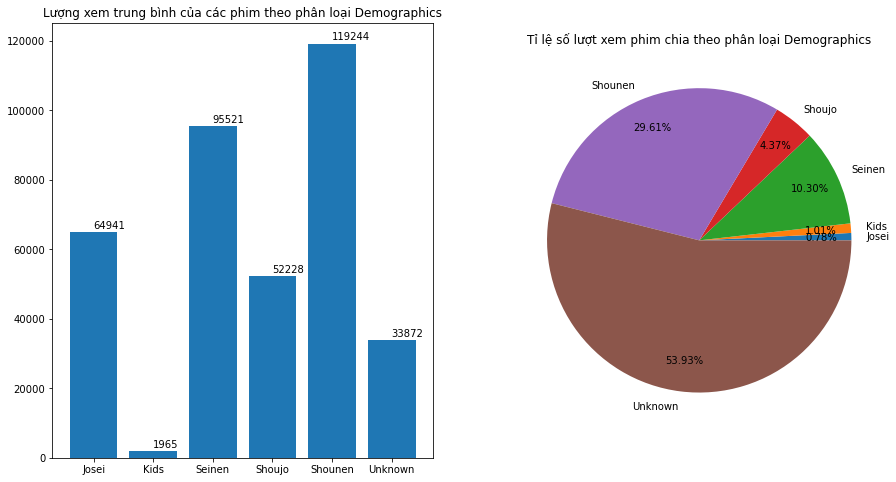

In [26]:
fig, axes = plt.subplots(1, 2, figsize=(15, 8))
axes[0].bar(data = demo_stat, x = 'Demographics', height = 'mean')
axes[0].set_title('Lượng xem trung bình của các phim theo phân loại Demographics')
for x in range(len(demo_stat['Demographics'])):
    axes[0].annotate(str(round(demo_stat['mean'][x])), xy = (demo_stat['Demographics'][x], demo_stat['mean'][x] + 1000))
    
axes[1].pie(demo_stat['sum'], labels = demo_stat['Demographics'], autopct='%.2f%%', pctdistance=0.8)
axes[1].set_title('Tỉ lệ số lượt xem phim chia theo phân loại Demographics')

Nhận xét:
- Trài ngược với số lượng phim, lượt xem trung bình của Unknown và Kids là thấp nhất. Cao nhất là các thể loại dành cho nam, như vậy cũng dễ hiểu khi mà các anime dành cho nam được phát hành nhiều hơn.
- Tuy lượt xem trung bình thấp nhưng nhờ vào số lượng nhiều mà Unknown chiếm hơn 50% tổng số lượt xem anime. Sau đó là đến nhóm dành cho nam, cho nữ và cuối cùng là trẻ em.

## Vậy mỗi quan hệ giữa 2 cột Demographics và Season là gì?

Đầu tiên ta sẽ thêm cột rank để sort thứ tự cho các mùa nhé.

In [17]:
merge_data = pd.merge(data, season_stat[['Season', 'rank']], how = 'left')
merge_data = merge_data.sort_values(by = ['Demographics', 'rank'])
merge_data

,Demographics,Season,sum,count,mean,rank
1,Josei,Spring,1671745,14,119410.357143,0
2,Josei,Summer,1184619,12,98718.250000,1
0,Josei,Fall,1462667,13,112512.846154,2
4,Josei,Winter,1531945,13,117841.923077,3
3,Josei,Unknown,708027,49,14449.530612,4
6,Kids,Spring,2008349,316,6355.534810,0
7,Kids,Summer,237607,122,1947.598361,1
5,Kids,Fall,1167834,243,4805.901235,2
9,Kids,Winter,421889,159,2653.389937,3
8,Kids,Unknown,4662347,3484,1338.216705,4


In [18]:
demo_val = demo_stat['Demographics'].values.tolist() 

### Hãy cùng xem thử đối với từng đối tượng trong cột Demographics thường được phát hành vào mùa nào trong năm và phát hành vào mùa nào sẽ được đón nhận hơn nhé.

Text(0.5, 1.05, 'Biểu đồ số lượng phim phát hành theo mùa phát hành và Demographics')

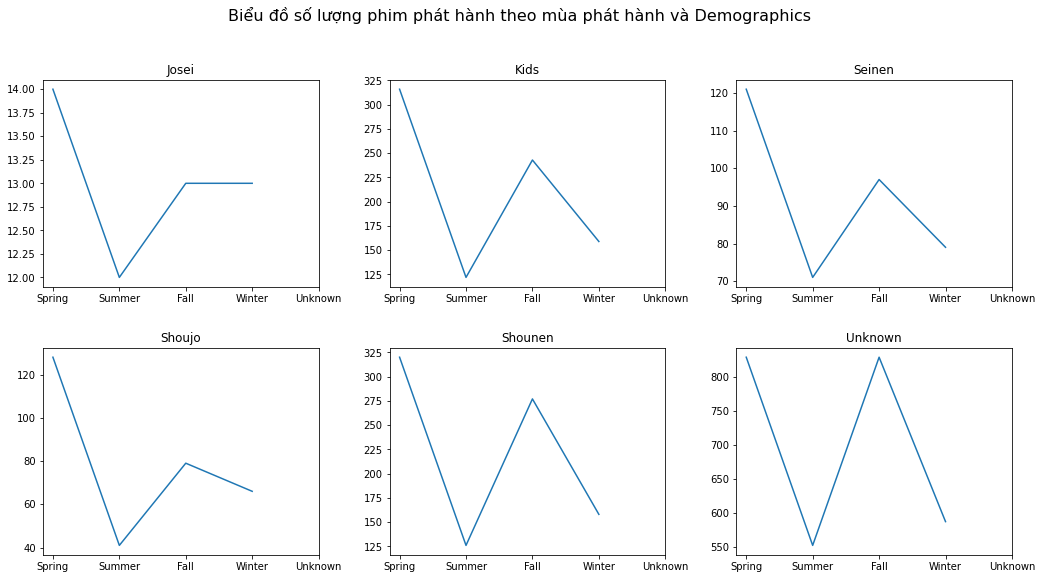

In [31]:
my_xticks = season_stat['Season'].values.tolist()
fig, axes = plt.subplots(2, 3, figsize=(15, 8))
fig.tight_layout(pad = 4)
for i in range(len(demo_val)):
    temp = merge_data[(merge_data['Demographics'] == demo_val[i]) & (merge_data['rank'] < 4)]
    axes[i // 3][i % 3].plot(temp['rank'], temp['count'])
    axes[i // 3][i % 3].set_title(demo_val[i])
    
    axes[i // 3][i % 3].yaxis.get_major_formatter().set_scientific(False)
    axes[i // 3][i % 3].yaxis.get_major_formatter().set_useOffset(False)
    axes[i // 3][i % 3].set_xticks(range(5))
    axes[i // 3][i % 3].set_xticklabels(my_xticks)
fig.suptitle('Biểu đồ số lượng phim phát hành theo mùa phát hành và Demographics', fontsize = 16, y = 1.05)

Nhận xét:
-  Nhìn vào biểu đồ ta có thể thấy được điểm chung là ở hầu hết các thể loại, anime không xác định được mùa phát hành chiếm số lượng lớn. Nhưng vì chênh lệch quá lớn nên không thể quan sát được 4 mùa, vậy nên ta sẽ bỏ cột này đi.
- Trong các phim xác định được mùa phát hành thì mùa xuân chiếm số lượng lớn nhất, chênh lệch lượt phát hành vào mùa xuân và mùa hạ là lớn nhất trong mọi biểu đồ, trong đó tỉ lệ chênh lệch lớn nhất là Kids, Shoujo, Shounen gấp 3 lần.
- Biểu đồ đạt đỉnh ở mùa xuân và mùa thu, đáy là mùa hạ và mùa đông.

Text(0.5, 1.05, 'Biểu đồ lượt xem trung bình của các phim chia theo Demographics và mùa phát hành')

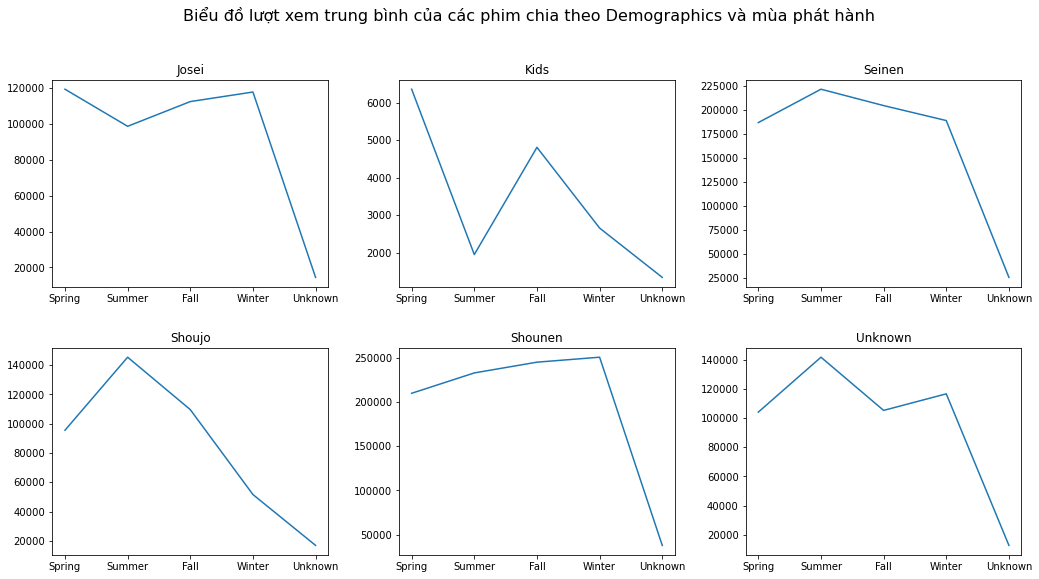

In [32]:
my_xticks = season_stat['Season'].values.tolist()
fig, axes = plt.subplots(2, 3, figsize=(15, 8))
fig.tight_layout(pad = 4)
for i in range(len(demo_val)):
    temp = merge_data[merge_data['Demographics'] == demo_val[i]]
    axes[i // 3][i % 3].plot(temp['rank'], temp['mean'])
    axes[i // 3][i % 3].set_title(demo_val[i])
    
    axes[i // 3][i % 3].yaxis.get_major_formatter().set_scientific(False)
    axes[i // 3][i % 3].yaxis.get_major_formatter().set_useOffset(False)
    axes[i // 3][i % 3].set_xticks(range(5))
    axes[i // 3][i % 3].set_xticklabels(my_xticks)
fig.suptitle('Biểu đồ lượt xem trung bình của các phim chia theo Demographics và mùa phát hành', fontsize = 16, y = 1.05)

Nhận xét:
- Khác với số lượng phim, ở lượt xem trung bình mùa không xác định được có số lượng thấp nhất.
- Trong các phim xác định được mùa, tùy theo đối tượng mà đồ thị ở mùa hè sẽ đạt đáy (Josei, Kids) hay đạt đỉnh (Shoujo, Seinen, Unknown). Ở mùa đông sẽ đạt đáy (Shoujo, Kids, Seinen) hay đạt đỉnh (Josei, Shounen)
- Có sự chênh lệch lớn giữa các mùa phát hành ở nhóm Shoujo (hè gấp 3 lần đông) và Kids (xuân gấp 3 lần hè).

Text(0.5, 1.0, 'Tỉ lệ lượt xem từng loại phim theo từng mùa phát hành')

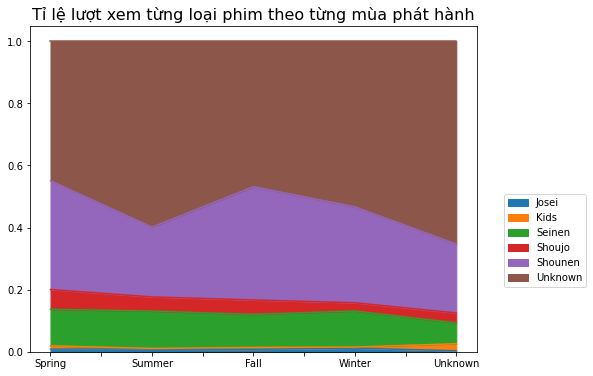

In [33]:
temp = pd.DataFrame(index = season_stat['Season'].values.tolist())
for i in range(len(demo_val)):
    temp[demo_val[i]] = (merge_data[merge_data['Demographics'] == demo_val[i]])['sum'].values.tolist()
to_draw = temp.iloc[:, :].div(temp.sum(axis=1), axis=0)

to_draw.plot.area(figsize = (8, 6))

plt.legend(bbox_to_anchor=(1.05, 0.5))
plt.title('Tỉ trọng tổng lượt xem từng loại phim theo từng mùa phát hành', fontsize = 16)

Nhận xét:
- Kids và Unknown chiếm tỉ trọng tăng dần về cuối năm, trong khi đó các thể loại còn lại có tỉ trọng giảm.
- Biến động về tỉ trọng lớn nhất là Shounen và Unknown, ta có thể nhìn thấy rõ ở 2 mùa hè và thu.